In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import random
import timeit
import numpy as np

In [2]:
def depthsearch(tree, entry):
    "This performs a binary search in Log time"
    flag = False
    if entry == tree["node"]:
        flag = True
    if entry < tree["node"]:
        if "left" in tree:
            flag = depthsearch(tree["left"], entry)
    if entry > tree["node"]:
        if "right" in tree:
            flag = depthsearch(tree["right"], entry)
    return(flag)

In [3]:
def tree_build_util(elem, tree):
    "private use only!"
    if "node" not in tree:
        tree["node"] = elem
    else:
        if elem < tree["node"]:
            if "left" in tree:
                tree_build_util(elem, tree["left"])
            else:
                tree["left"] = {}
                tree["left"]["node"] = elem
        if elem >tree["node"]:
            if "right" in tree:
                tree_build_util(elem, tree["right"])
            else:
                tree["right"] = {}
                tree["right"]["node"] = elem
                
    return(tree)

def tree_build(elem_list):
    "should have a proper doc string"
    random.shuffle(elem_list)
    tree={}
    for elem in elem_list:
        tree = tree_build_util(elem,tree)
    return tree

# And Now for the Benchmarking:!

In [8]:
def average_time_for_vector(input_vector):
    "returns a tuple of 2 # representing the average time it takes to perform 100 search ops the first will be for a linear search and the second will be of a binary search"
    #builds a tree based on the first N values of the input vector
    
    tree = tree_build(input_vector) # build the tree
    
    max_int = np.max(input_vector)
    
    #now we benchmark: 
    # first the binary search: 
    
    time = 0 #start timer
    start = timeit.default_timer()
    
    #run search 100 times:
    for j in range(10):
        ri=0
        if(random.random()<0.5):
            ri = max_int + 100
        else:
            ri = random.choice(input_vector)
        depthsearch(tree, ri)
    #stop timer:
    stop = timeit.default_timer()
    #get total time for 100 searches 
    time_bin = (stop - start) # time for tree search! 
    
    
    time = 0 #start timer
    start = timeit.default_timer()
    
    #run search 100 times:
    for j in range(100):
        ri=0
        if(random.random()<0.5):
            ri = max_int + 100
        else:
            ri = random.choice(input_vector)
        dummy = ri in input_vector
    #stop timer:
    stop = timeit.default_timer()
    #get total time for 100 searches 
    time_lin = (stop - start) # time for tree search! 
    return (time_bin,time_lin)
  


(0.00011427899880800396, 0.6977686699974583)

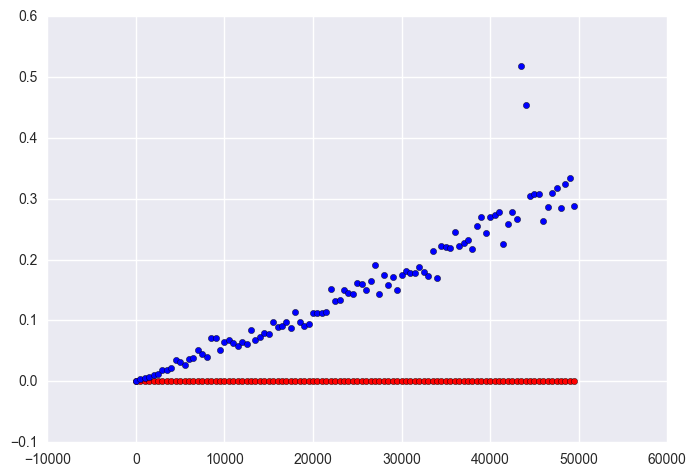

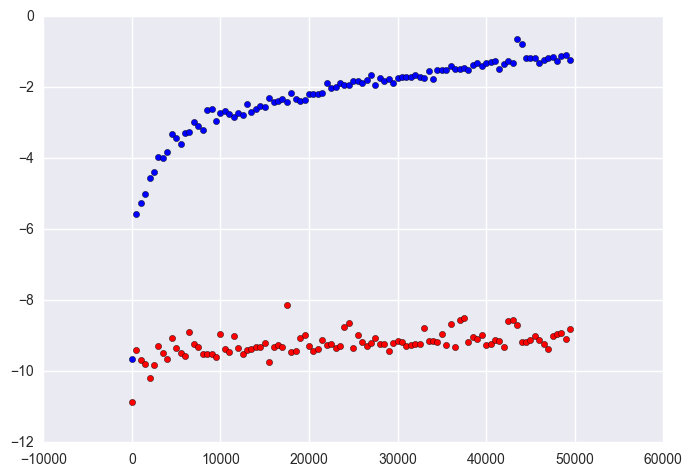

In [13]:

#plots the speed of a tree search for the first N values within a list
def plot_speeds(input_vector,N,steps):
    #creates list of how many items to serach through
    list_of_N = np.arange(1,N,steps)
    

    
#loop plots the time it takes to run a search each number of items it searches through
    timer_res = [average_time_for_vector(input_vector[:i]) for i in list_of_N]
    plt.scatter(list_of_N,[t[0] for t in timer_res],c="r")
    plt.scatter(list_of_N,[t[1] for t in timer_res],c="b")
    plt.show()
    plt.scatter(list_of_N,[np.log(t[0])  for t in timer_res],c="r")
    plt.scatter(list_of_N,[np.log(t[1]) for t in timer_res],c="b")
    plt.show()

    
li=list(range(100000))
random.shuffle(li)

plot_speeds(li,50000,500)